## <center> 概述</center>

#### 1.ArcGIS API for Python
  * Portal 管理
    - 创建用户
    - 自定义橘色
    - 导入证书
    - Portal日志的管理
  * Server 管理
    - 访问到server
    - 管理 服务
    - server日志管理
    - 使用率的管理
    
#### 2.直接使用Python进行管理
#### 3.现有工具以及学习资料分享

<center><h2> What is the Python API for ArcGIS </h2></center>

The ArcGIS API for Python lets ArcGIS Online and ArcGIS Enterprise users, analysts, developers and administrators script and automate tasks ranging from performing big data analysis to content management and administration of their web GIS.
<img src="images/PythonAPIGettingStarted.png" />

<center> <h2> Who Uses the ArcGIS API for Python </h2> </center>

<img src="images/WhatIsArcGISPython.PNG"/>

<center> <h2> 连接到 GIS</h2></center>

- 这里所说的 GIS 是 ArcGIS Online 或者 ArcGIS Portal
- 支持所有的认证方法

支持所有的认证方式，包括最简单的匿名访问、用户名密码、LDAP、open auth 等 认证方式

<h4> 访问到你的 GIS </h4>

In [2]:
from arcgis.gis import GIS
gis = GIS(url="https://liy.esrichina.com/portal", 
          username="arcgis",
          verify_cert=False)

Enter password: ········


<center>
<h2><b>Portal 管理 </b> </h2>


<img src="https://server.arcgis.com/en/data-store/10.4/install/windows/GUID-D6450E2F-31B2-42D4-8EBA-F1B0E3D5EEE4-web.png" align="center" /></center>

<center>
<h3 class="title"><b>创建用户</b> </h3>
</center>

<User username:demoaccount2a>
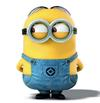

In [8]:
user = gis.users.create(level=2,
                        firstname="Demo",
                        lastname="Account2a",
                        username="demoaccount2a",
                        email="fake@esri.com",
                        thumbnail="images/delu.png",
                        password="Super123")
user

In [7]:
user.delete()

True

<center>
<h3 class="title"><b>创建自定义角色</b> </h3>
</center>

In [14]:
roles = gis.users.roles
print(roles.all())

[<Role name: Viewer, description: Viewer>, <Role name: ucdemo2, description: UC Demo Role 2017>]


In [12]:
privs = ['portal:publisher:publishFeatures','portal:user:createGroup','portal:user:viewOrgGroups', 'portal:user:createItem', 
         'portal:user:viewOrgItems', 'portal:user:shareGroupToOrg', 'portal:user:shareToPublic', 'portal:user:shareToOrg', 
         'portal:user:shareToGroup', 'portal:user:joinGroup', 'features:user:fullEdit', 'features:user:edit']
customrole = roles.create('ucdemo2', 'UC Demo Role 2017', privs)

In [13]:
customrole.role_id

'sECXUWYP1GqkOPS0'

In [16]:
demo = gis.users.get('demoaccount2a')
print(demo.role)
resp = demo.update_role(customrole)
print(demo.role)

org_user
sECXUWYP1GqkOPS0


<center>
<h3 class="title"><b>分配自定义角色</b> </h3>
</center>

In [19]:
newbm = gis.users.create(username='bmajor_uc', password='bmajor_uc123', firstname='Bill', lastname='Major', \
                         email='uc@esri.com', description='Bill Account for UC Level 1', role='org_viewer', level=1)

In [20]:
newbm.update_role(customrole)

True

In [21]:
newbm.delete()
#customrole.delete()

True

<center>
<h3 class="title"><b>导入SSL证书</b> </h3>
</center>

- 导入之后需要重启portal

斯克弱体

In [22]:
security = gis.admin.security

In [ ]:
v = security.ssl.import_certificate(alias="portal_cert", 
                                    certificate="data/ESRIEnterpriseRoot.crt")

<center>
<h3 class="title"><b>Portal日志管理</b> </h3>
</center>

In [23]:
import datetime
import os
import pandas as pd
start_time = datetime.datetime.now() - datetime.timedelta(days=20)

In [24]:
logs = gis.admin.logs
res = logs.query(start_time)

In [25]:
df = pd.DataFrame(res['logMessages'])
df[['code', 'message', 'type']].head()

,code,message,type
0,219999,创建用户“bmajor_uc2”失败。该用户已存在。请检查用户名后重试。,WARNING
1,217064,发现 web 服务器已停止。正在重新启动。,WARNING
2,217060,发现数据库服务器已停止。正在重新启动。,WARNING
3,218015,已启动索引服务。,WARNING
4,218014,正在启动索引服务。,WARNING


<center>
<h2 class="title"><b>Server 管理</b> </h2>
</center>

在ArcGIS API for Python 1.2版本 引入了gis.admin模块，来管理ArcGIS servers，下面列出了所有的模块接口，其中包括托管联合、安全设置、站点管理等

<img src="http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_gis_admin_module_01.png"></img>

In [1]:
from arcgis.gis import GIS
gis = GIS(url="https://liy.esrichina.com/portal", 
          username="arcgis",
          password="Super123",
          verify_cert=False)

<center>
<h3 class="title"><b>Server 状态</b> </h3>
</center>

- 确保GIS服务器的稳定和正常运行是管理员的日常任务
- API提供了一种去查看每台机器正常运行的简单方式

In [2]:
servers=gis.admin.servers

In [10]:
#Validate your servers验证servr
servers.validate()

True

<center>
    <h3 class="title"><b>获取联合服务器</b> </h3>
</center>
<br/>

In [3]:
#获取联合或托管到portal的server
gisserver = servers.list()
gisserver

[<Server at https://liy.esrichina.com:6443/arcgis/admin>,
 <Server at https://sms.esrichina.com:6443/arcgis/admin>]

<center>
<h3 class="title"><b>使用角色或者服务器功能去查找server</b> </h3>
</center>

- API提供了使用服务器功能或者用户角色去查找server的简单方式
- 允许特定的服务器使用类型搜索

In [23]:
analytics_server = servers.get(role="", function="GeoAnalytics")
print(analytics_server)

[<Server at https://liy.esrichina.com:6443/arcgis/admin>]


In [4]:
hosting_server = servers.get(role="HOSTING_SERVER")[0]
hosting_server

<Server at https://liy.esrichina.com:6443/arcgis/admin>

<center>
    <h3 class="title"><b>管理server的数据存储</b> </h3>
</center>

In [14]:
server=gisserver[0]
dstores = server.datastores.list()
len(dstores)

3

In [15]:
dstores = server.datastores.list()
for dstore in dstores:
    print(dstore.properties.path)

/enterpriseDatabases/AGSDataStore_ds_lnmjlh3g
/fileShares/esridev_test
/nosqlDatabases/AGSDataStore_nosqldb_tcs_6u7qzuxl


In [16]:
#注册文件夹
ca_datastore = server.datastores.add_folder(name='pytext',server_path='\\\\192.168.100.139\sms')
ca_datastore

<Datastore title:"https://liy.esrichina.com:6443/arcgis/admin/data/items/fileShares/pytext" type:"folder">

In [19]:
#验证注册的文件夹
ca_datastore.validate()

True

<center>
<h3 class="title"><b>服务的管理</b> </h3>
</center>


- 侧重于服务的管理而不是使用

In [11]:
services = hosting_server.services
services

<ServiceManager at https://liy.esrichina.com:6443/arcgis/admin/services>

<center>
<h3 class="title"><b>管理服务的文件夹</b> </h3>
</center>

In [12]:
print(services.folders)
print(services.create_folder("esridevtest1"))
print(services.folders)
print(services.delete_folder("esridevtest1"))
print(services.folders)

['esridev', 'Hosted', 'System', 'Utilities', '/']
True
['esridev', 'Hosted', 'System', 'Utilities', '/']
False
['esridev', 'Hosted', 'System', 'Utilities', '/']


<center>
<h3 class="title"><b>管理服务</b> </h3>
</center>

In [17]:
sampleworld = services.list()[-1]

sampleworld.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

In [19]:
#停止service
sampleworld.stop()
sampleworld.status

{'configuredState': 'STOPPED', 'realTimeState': 'STOPPED'}

In [20]:
#启动service
sampleworld.start()
sampleworld.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

<center>
<h3 class="title"><b>server日志管理</b> </h3>
</center>

- 发现问题
- 解决问题
- 控制日志大小

In [34]:
logs = hosting_server.logs

<LogManager at https://liy.esrichina.com:6443/arcgis/admin/logs>

In [9]:
import datetime
import pandas as pd
now = datetime.datetime.now()
start_time = now - datetime.timedelta(days=40)

<center>
<h3 class="title"><b>server日志可视化</b> </h3>
</center>

In [55]:
res = hosting_server.logs.query(start_time = start_time, end_time = now, level = 'WARNING')['logMessages']
df = pd.DataFrame.from_records(res)
df[['code', 'machine', 'message']].head()

,code,machine,message
0,6602,LIY.ESRICHINA.COM,Failed to return the service configuration 'Ut...
1,7551,LIY.ESRICHINA.COM,Instance of the service 'System/PublishingTool...
2,7551,LIY.ESRICHINA.COM,Instance of the service 'System/PublishingTool...
3,7551,LIY.ESRICHINA.COM,Instance of the service 'Utilities/PrintingToo...
4,6602,LIY.ESRICHINA.COM,Failed to return the service configuration 'Ut...


In [53]:
res1 = hosting_server.logs.query(start_time = start_time, end_time=now, level='WARNING') # get all messages
res1

{'hasMore': False,
 'startTime': 1524627390795,
 'endTime': 1524188319761,
 'logMessages': [{'type': 'SEVERE',
   'message': "Failed to return the service configuration 'Utilities/PrintingTools.GPServer'. Server machine 'https://LIY.ESRICHINA.COM:7443/arcgis/sharing/rest/content/items/b50adc00c866420ca526b0868f382ca9' returned an error. 'Item does not exist or is inaccessible.'",
   'time': 1524627390795,
   'source': 'Admin',
   'machine': 'LIY.ESRICHINA.COM',
   'user': '',
   'code': 6602,
   'elapsed': '',
   'process': '7856',
   'thread': '17',
   'methodName': ''},
  {'type': 'SEVERE',
   'message': "Instance of the service 'System/PublishingToolsEx.GPServer' crashed. Please see if an error report was generated in 'E:\\arcgisdata\\arcgisserver\\logs\\LIY.ESRICHINA.COM\\errorreports'. To send an error report to Esri, compose an e-mail to ArcGISErrorReport@esri.com and attach the error report file.",
   'time': 1524626748080,
   'source': 'Server',
   'machine': 'LIY.ESRICHINA.COM

<center>
<h3 class="title"><b>监控server的使用</b> </h3>
</center>

ArcGIS Server记录各种服务统计信息，例如总请求数，平均响应时间和超时。管理员和发布者可以使用此信息来监视服务活动，以更好地了解客户端如何使用服务。


1.过去一周内，我的ArcGIS Server网站处理的请求总数是多少？<br/>
2.在过去一个月内如何分配服务请求负载？<br/>
3.在特定服务的特定时间使用的服务实例的最大数量是多少？

<center>
<h3 class="title"><b>使用server的内置报告</b> </h3>
</center>


In [72]:
report = hosting_server.usage.list()
for r in report:
    print (r)
    print(r.properties['reportname'])

<Report at https://liy.esrichina.com:6443/arcgis/admin/usagereports/Max%20response%20times%20for%20the%20last%207%20days>
Max response times for the last 7 days
<Report at https://liy.esrichina.com:6443/arcgis/admin/usagereports/Timed-out%20requests%20for%20the%20last%207%20days>
Timed-out requests for the last 7 days
<Report at https://liy.esrichina.com:6443/arcgis/admin/usagereports/Total%20requests%20for%20the%20last%207%20days>
Total requests for the last 7 days


<center>
<h3 class="title"><b>最后七天的请求时间报告</b> </h3>
</center>

In [45]:
maxreport = gisserver[1].usage.list()[0]
maxreport

<Report at https://sms.esrichina.com:6443/arcgis/admin/usagereports/Max%20response%20times%20for%20the%20last%207%20days>

In [11]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

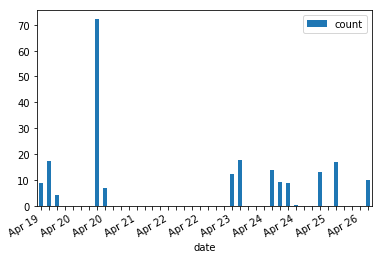

In [44]:
data = maxreport.query()
#设置y轴为响应时间
data_y = data['report']['report-data'][0][0]['data']
# 设置x轴为日期
data_x = [pd.to_datetime(datetime.fromtimestamp(d//1000)).strftime('%b-%d-%Y %H:%M:%S') \
          for d in data['report']['time-slices']]
data_z= [pd.to_datetime(datetime.fromtimestamp(d//1000)).strftime('%b %d') \
          for d in data['report']['time-slices']]
df = pd.DataFrame(list(zip(data_y, data_x,data_z)), columns=["count", "date","datastr"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['datastr']
df['count'] = df['count'] 
ax = df.plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.show()

<center>
<h3 class="title"><b>创建快速报告</b> </h3>
</center>

#### 支持多种时间跨度：
1.LAST_DAY - 距现在时间的24小时<br/>
2.LAST_WEEK - 距现在时间的7天<br/>
3.LAST_MONTH - 距现在时间的31天<br/>
4.LAST_YEAR - 距现在时间的365天

#### 快速报告的指标
1.RequestCount - 收到的请求数量 <br/>
2.RequestsFailed - 失败的请求数 <br/>
3.RequestsTimedOut - 超时的请求数 <br/>
4.RequestMaxResponseTime - 最大响应时间 <br/>
5.RequestAvgResponseTime - 平均响应时间 <br/>
6.ServiceActiveInstances - 针对指定服务以1分钟间隔抽样的活动（正在运行）的服务实例的最大数量

#### <center>获取最近一个月的请求总数</center>

In [4]:
data = gisserver[1].usage.quick_report(since="LAST_MONTH", metrics="RequestCount")
data['report'].keys()

dict_keys(['reportname', 'metadata', 'time-slices', 'report-data'])

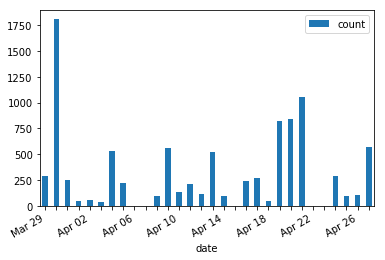

In [16]:
#设置请求时间为Y轴
data_y = data['report']['report-data'][0][0]['data']
#设置日期为X轴
data_x = [pd.to_datetime(datetime.fromtimestamp(d//1000)).strftime('%b-%d-%Y %H:%M:%S') \
          for d in data['report']['time-slices']]
#设置X轴显示的内容
data_z = [pd.to_datetime(datetime.fromtimestamp(d//1000)).strftime('%b %d') \
          for d in data['report']['time-slices']]
#创建panda DataFrame
df = pd.DataFrame(list(zip(data_x, data_y,data_z)), columns=["date", "count","datestr"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['datestr']
df['count'] = df['count'] 
#plot as a bar chart
ax = df.plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.show()

###  <center>直接使用python进行管理</center>



<center><img src="images/demo.jpg"></img></center>

### <center>现有工具以及学习资料分享</center>

#### 在server安装目录/tools/admin下有
#### https://github.com/makeling/arcgis_automate_checking_tools，用于检查ArcGIS Enterprise平台运行状况和性能的python工具集。
#### https://github.com/makeling/arcgis_enterprise_automated_tools  &&  http://zhihu.esrichina.com.cn/article/3703，linux下自动化安装webadaptor
#### https://developers.arcgis.com/rest/  &&  https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.toc.html